In [0]:
# Mount ADLS to read data source
application_id = "PLEASE_ENTER_YOUR_OWN_APPLICATION_ID"
directory_id = "PLEASE_ENTER_YOUR_OWN_AZURE_AD_DIRECTORY_ID"
scope_name = "PLEASE_ENTER_YOUR_OWN_SCOPE_NAME_IN_DATABRICKS"
key_name = "PLEASE_ENTER_YOUR_OWN_KEY_NAME_IN_SCOPE_OF_DATABRICKS"
adls_container_name = "PLEASE_ENTER_YOUR_OWN_ADLS_CONTAINER_NAME"
adls_account_name = "PLEASE_ENTER_YOUR_OWN_ADLS_STORAGE_ACCOUNT_NAME"
mount_point_name = "PLEASE_ENTER_YOUR_OWN_MOUNT_POINT_NAME"

configs = {"fs.azure.account.auth.type": "OAuth",
           "fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
           "fs.azure.account.oauth2.client.id": application_id,
           "fs.azure.account.oauth2.client.secret": dbutils.secrets.get(scope=scope_name,key=key_name),
           "fs.azure.account.oauth2.client.endpoint": "https://login.microsoftonline.com/"+directory_id+"/oauth2/token"}

dbutils.fs.mount(
  source = "abfss://"+adls_container_name+"@"+adls_account_name+".dfs.core.windows.net/",
  mount_point = "/mnt/"+mount_point_name,
  extra_configs = configs)

Out[11]: True

In [0]:
# List file in ADLS
dbutils.fs.ls("/mnt/PLEASE_ENTER_YOUR_OWN_MOUNT_POINT_NAME")

Out[17]: [FileInfo(path='dbfs:/mnt/adbadlstest01_store01/pima-indians-diabetes-data.csv', name='pima-indians-diabetes-data.csv', size=23278)]

In [0]:
# Unmount ADLS as needed
# dbutils.fs.unmount("/mnt/PLEASE_ENTER_YOUR_OWN_MOUNT_POINT_NAME")

/mnt/adbadlstest01_store01 has been unmounted.
Out[10]: True

In [0]:
# Exploring data in ADLS with Pandas
import pandas as pd
# Read source data from ADLS.
csv_file = '/dbfs/mnt/PLEASE_ENTER_YOUR_OWN_MOUNT_POINT_NAME/pima-indians-diabetes-data.csv'
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df = pd.read_csv(csv_file, names=names)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


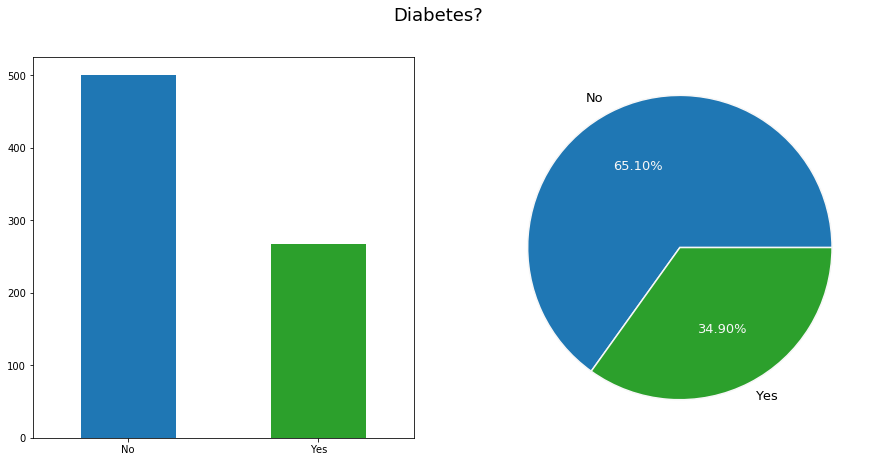

In [0]:
# Plotting data by Matplotlib & Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = diabetes_df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = diabetes_df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

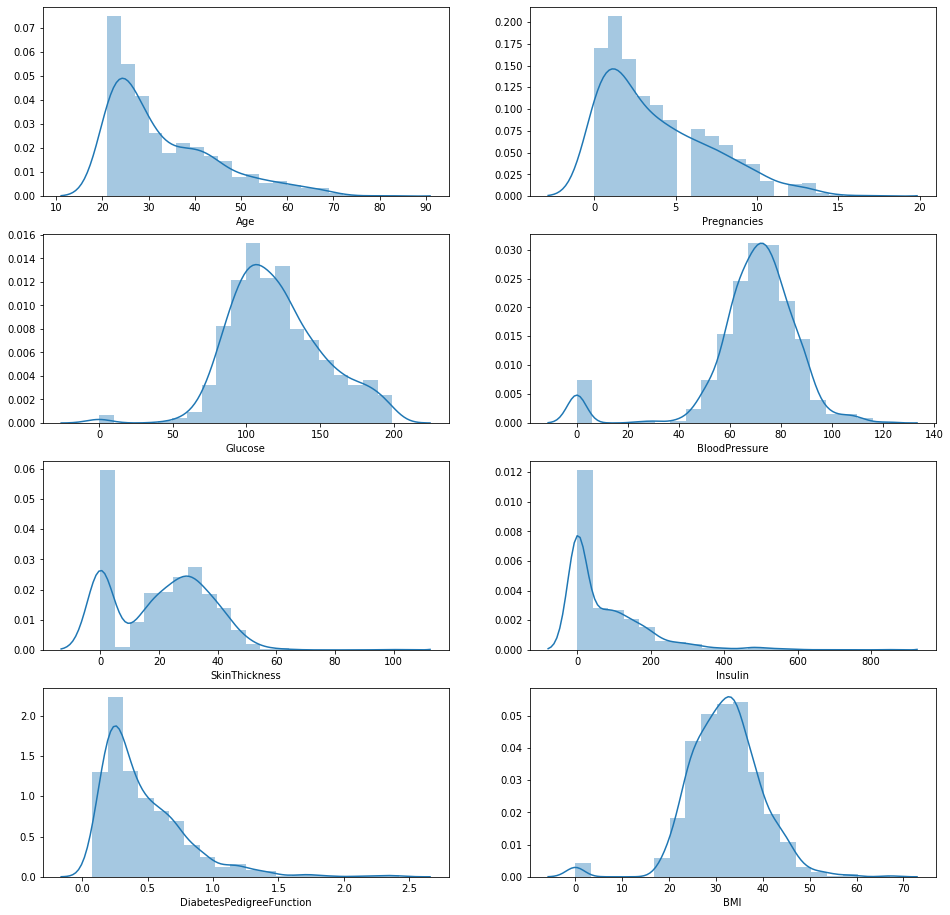

In [0]:
# Plotting data distribution by Matplotlib & Seaborn
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes_df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(diabetes_df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(diabetes_df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(diabetes_df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(diabetes_df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(diabetes_df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(diabetes_df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(diabetes_df.BMI, bins = 20, ax=ax[3,1]) 

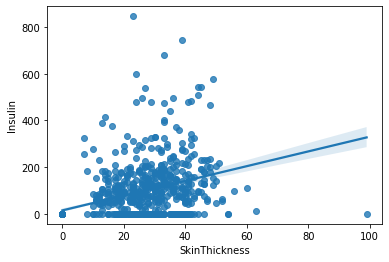

In [0]:
# Plotting columns relationship by Seaborn
sns.regplot(x='SkinThickness', y= 'Insulin', data=diabetes_df)

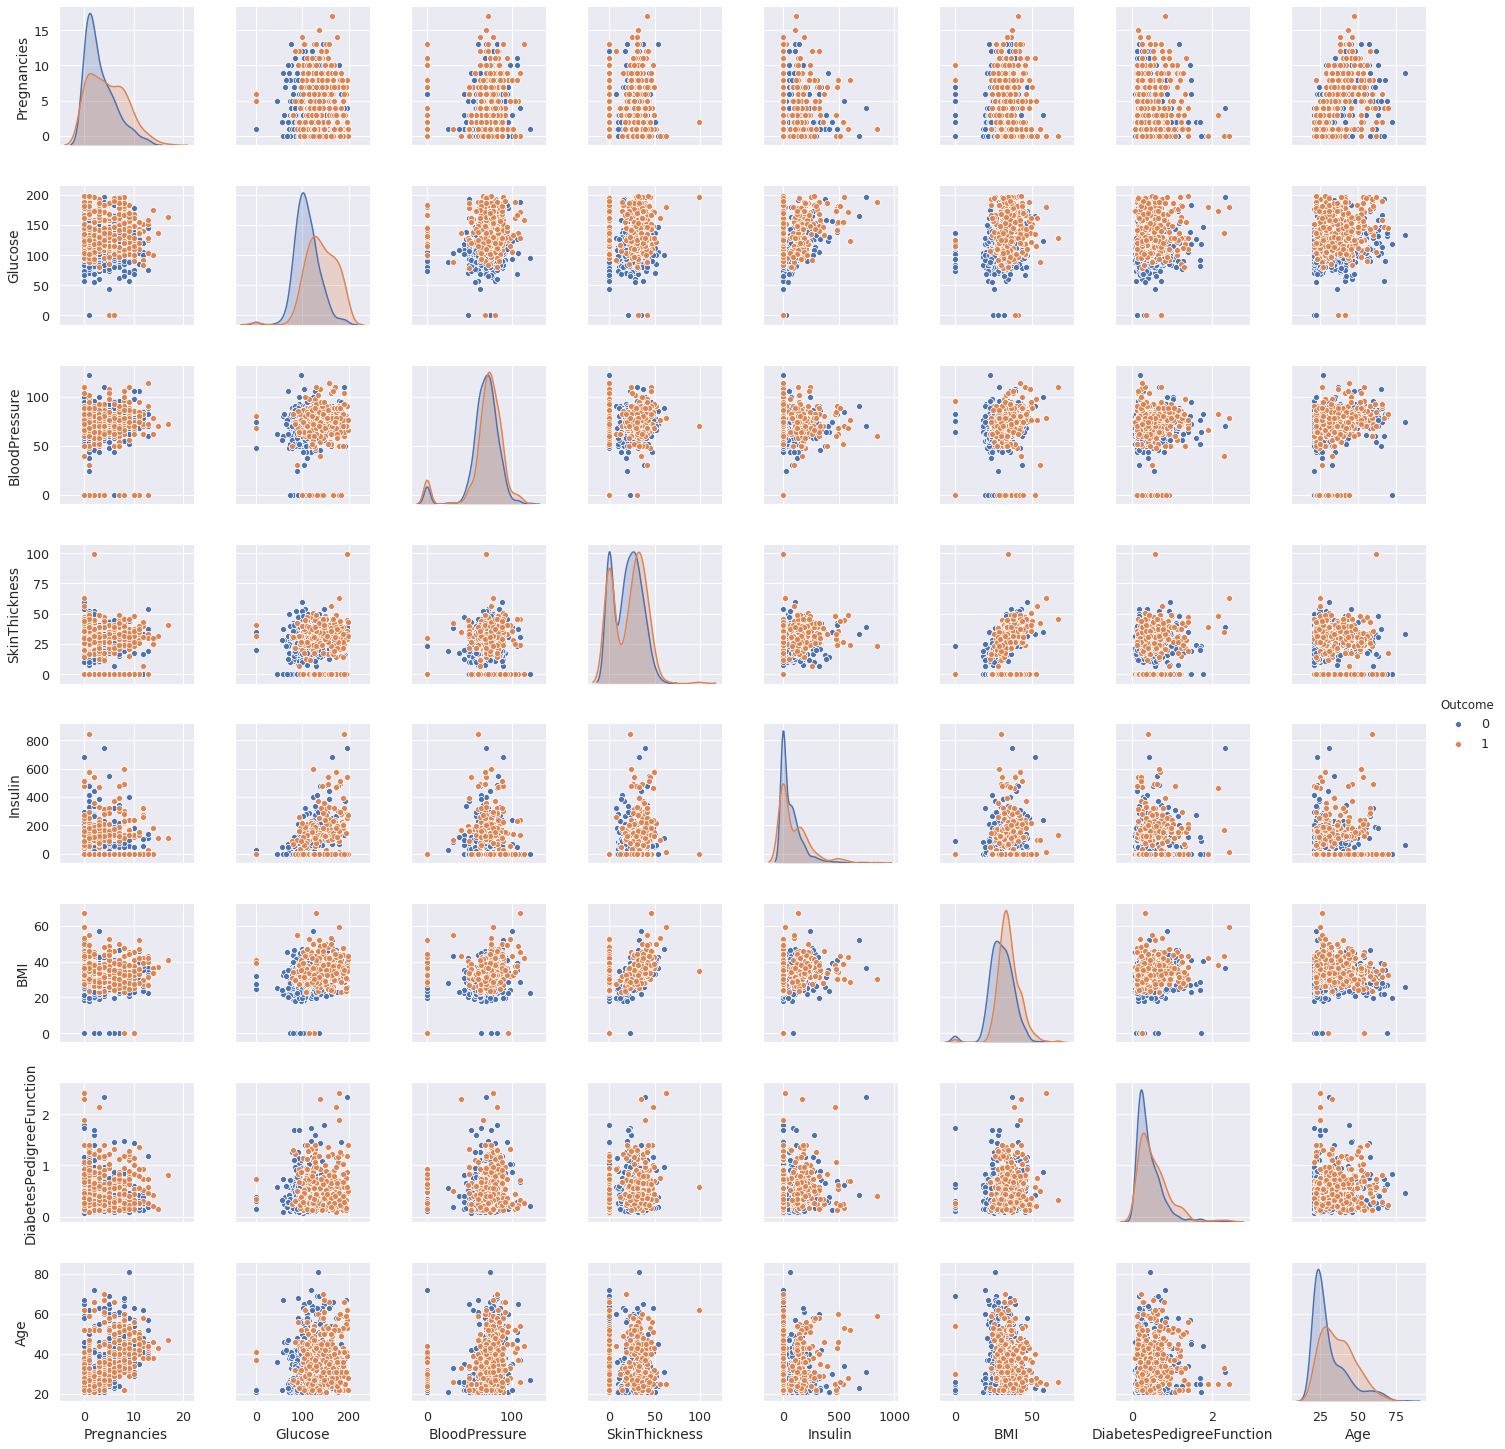

In [0]:
# Plotting Pair Plots to understand the best set of features to explain a relationship between two variables or to form the most separated clusters by Seaborn
sns.pairplot(data=diabetes_df,hue='Outcome')

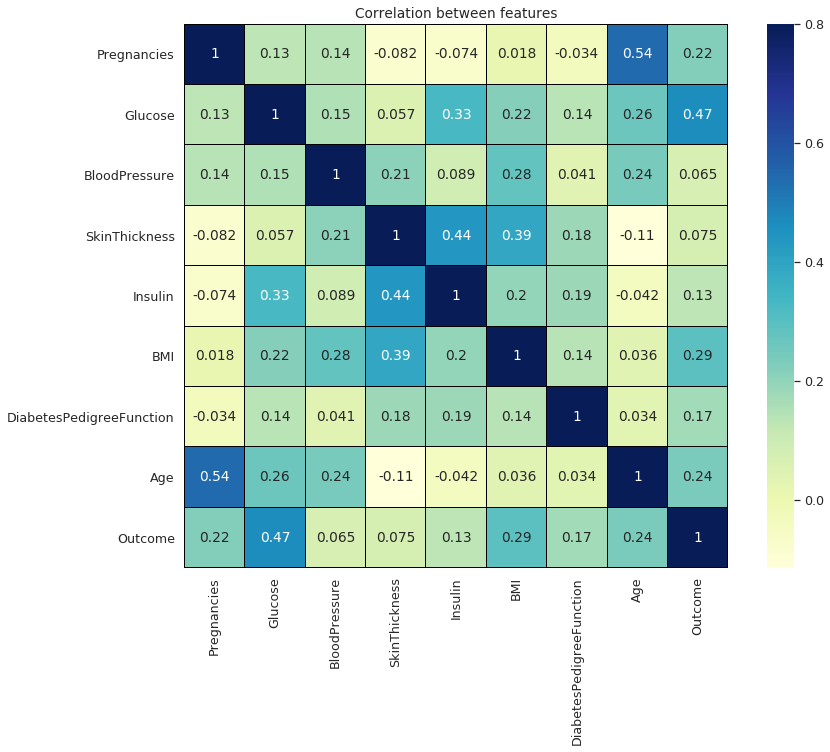

In [0]:
# Plotting columns/features correlation in-between by Matplotlib & Seaborn
corr=diabetes_df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

In [0]:
# Mount Blob Storage to read data source.
scope_name = "PLEASE_ENTER_YOUR_OWN_SCOPE_NAME_IN_DATABRICKS"
key_name = "PLEASE_ENTER_YOUR_OWN_KEY_NAME_IN_SCOPE_OF_DATABRICKS"
blob_container_name = "PLEASE_ENTER_YOUR_OWN_BLOB_STORAGE_CONTAINER_NAME"
blob_account_name = "PLEASE_ENTER_YOUR_OWN_BLOB_STORAGE_ACCOUNT_NAME"
mount_point_name = "PLEASE_ENTER_YOUR_OWN_MOUNT_POINT_NAME"
conf_key = "fs.azure.account.key.PLEASE_ENTER_YOUR_OWN_BLOB_STORAGE_ACCOUNT_NAME.blob.core.windows.net"

dbutils.fs.mount(
  source = "wasbs://"+blob_container_name+"@"+blob_account_name+".blob.core.windows.net",
  mount_point = "/mnt/"+mount_point_name,
  extra_configs = {conf_key:dbutils.secrets.get(scope=scope_name, key=key_name)})

Out[2]: True

In [0]:
# List file in Blob Storage
dbutils.fs.ls("/mnt/PLEASE_ENTER_YOUR_OWN_MOUNT_POINT_NAME")

Out[3]: [FileInfo(path='dbfs:/mnt/adbblobtest01_store01/pima-indians-diabetes-data.csv', name='pima-indians-diabetes-data.csv', size=23278)]

In [0]:
# Unmount Azure Blob Storage as needed.
# dbutils.fs.unmount("/mnt/PLEASE_ENTER_YOUR_OWN_MOUNT_POINT_NAME")

In [0]:
# Exploring data in Blob Storage with Pandas
import json 
import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df

# Load json file
with open('/dbfs/mnt/PLEASE_ENTER_YOUR_OWN_MOUNT_POINT_NAME/raw_nyc_phil.json') as f:
    d = json.load(f)
nycphil_df = json_normalize(d['programs'])
nycphil_df.head()

,season,orchestra,concerts,programID,works,id
0,1842-43,New York Philharmonic,"[{'Date': '1842-12-07T05:00:00Z', 'eventType':...",3853,"[{'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP....",38e072a7-8fc9-4f9a-8eac-3957905c0002
1,1842-43,New York Philharmonic,"[{'Date': '1843-02-18T05:00:00Z', 'eventType':...",5178,[{'workTitle': 'SYMPHONY NO. 3 IN E FLAT MAJOR...,c7b2b95c-5e0b-431c-a340-5b37fc860b34
2,1842-43,Musicians from the New York Philharmonic,"[{'Date': '1843-04-07T05:00:00Z', 'eventType':...",10785,"[{'workTitle': 'EGMONT, OP.84', 'composerName'...",894e1a52-1ae5-4fa7-aec0-b99997555a37
3,1842-43,New York Philharmonic,"[{'Date': '1843-04-22T05:00:00Z', 'eventType':...",5887,"[{'workTitle': 'SYMPHONY NO. 2 IN D MAJOR, OP....",34ec2c2b-3297-4716-9831-b538310462b7
4,1843-44,New York Philharmonic,"[{'Date': '1843-11-18T05:00:00Z', 'eventType':...",305,"[{'workTitle': 'SYMPHONY NO. 7 IN A MAJOR, OP....",610a4acc-94e4-4cd6-bdc1-8ad020edc7e9


In [0]:
nycphil_df_works_data = json_normalize(data=d['programs'], record_path='works', 
                            meta=['id', 'orchestra','programID', 'season'])
nycphil_df_works_data.head()

,workTitle,conductorName,ID,soloists,composerName,movement,interval,movement.em,movement._,workTitle.em,workTitle._,id,orchestra,programID,season
0,"SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",52446*,[],"Beethoven, Ludwig van",NaN,NaN,NaN,NaN,NaN,NaN,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43
1,OBERON,"Timm, Henry C.",8834*4,"[{'soloistName': 'Otto, Antoinette', 'soloistR...","Weber, Carl Maria Von","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,NaN,NaN,NaN,NaN,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43
2,"QUINTET, PIANO, D MINOR, OP. 74",NaN,3642*,"[{'soloistName': 'Scharfenberg, William', 'sol...","Hummel, Johann",NaN,NaN,NaN,NaN,NaN,NaN,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43
3,NaN,NaN,0*,[],NaN,NaN,Intermission,NaN,NaN,NaN,NaN,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43
4,OBERON,"Etienne, Denis G.",8834*3,[],"Weber, Carl Maria Von",Overture,NaN,NaN,NaN,NaN,NaN,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43


In [0]:
nycphil_df_soloist_data = json_normalize(data=d['programs'], record_path=['works', 'soloists'], 
                              meta=['id'])
nycphil_df_soloist_data.head()

,soloistName,soloistRoles,soloistInstrument,id
0,"Otto, Antoinette",S,Soprano,38e072a7-8fc9-4f9a-8eac-3957905c0002
1,"Scharfenberg, William",A,Piano,38e072a7-8fc9-4f9a-8eac-3957905c0002
2,"Hill, Ureli Corelli",A,Violin,38e072a7-8fc9-4f9a-8eac-3957905c0002
3,"Derwort, G. H.",A,Viola,38e072a7-8fc9-4f9a-8eac-3957905c0002
4,"Boucher, Alfred",A,Cello,38e072a7-8fc9-4f9a-8eac-3957905c0002


In [0]:
nycphil_df_soloist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56194 entries, 0 to 56193
Data columns (total 4 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 soloistName 56194 non-null object
 1 soloistRoles 56194 non-null object
 2 soloistInstrument 56194 non-null object
 3 id 56194 non-null object
dtypes: object(4)
memory usage: 1.7+ MB

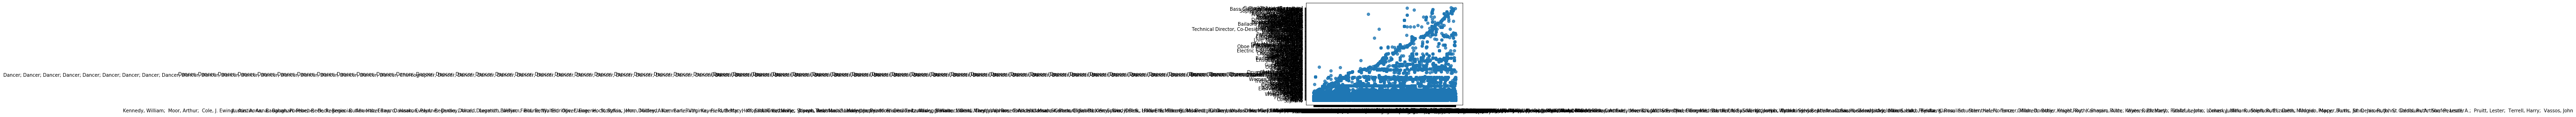

In [0]:
# Plotting columns relationship by Seaborn
sns.regplot(x='soloistName', y= 'soloistInstrument', data=nycphil_df_soloist_data)

In [0]:
# Connect to Azure SQL Database to read data source via Spark JDBC driver
jdbcHostname = "PLEASE_ENTER_YOUR_OWN_AZURE_SQL_DATABASE_SERVER_FQDN"
jdbcDatabase = "PLEASE_ENTER_YOUR_OWN_AZURE_SQL_DATABASE_NAME"
jdbcPort = 1433
jdbcUsername = "PLEASE_ENTER_YOUR_OWN_AZURE_SQL_DATABASE_USER_LOGIN"
scope_name = "PLEASE_ENTER_YOUR_OWN_SCOPE_NAME_IN_DATABRICKS"
key_name = "PLEASE_ENTER_YOUR_OWN_KEY_NAME_IN_SCOPE_OF_DATABRICKS"
jdbcPassword = dbutils.secrets.get(scope=scope_name,key=key_name)
jdbcUrl = "jdbc:sqlserver://{0}:{1};database={2}".format(jdbcHostname, jdbcPort, jdbcDatabase)
connectionProperties = {
  "user" : jdbcUsername,
  "password" : jdbcPassword,
  "driver" : "com.microsoft.sqlserver.jdbc.SQLServerDriver"
}

In [0]:
# Push down a query to Azure SQL Database via Spark JDBC driver
pushdown_query = "(select * from SalesLT.Customer) pushdown_query_test"
sql_df = spark.read.jdbc(url=jdbcUrl, table=pushdown_query, properties=connectionProperties)
display(sql_df)

CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,EmailAddress,Phone,PasswordHash,PasswordSalt,rowguid,ModifiedDate
1,false,Mr.,Orlando,N.,Gee,null,A Bike Store,adventure-works\pamela0,orlando0@adventure-works.com,245-555-0173,L/Rlwxzp4w7RWmEgXX+/A7cXaePEPcp+KwQhl2fJL7w=,1KjXYs4=,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2005-08-01T00:00:00.000+0000
2,false,Mr.,Keith,null,Harris,null,Progressive Sports,adventure-works\david8,keith0@adventure-works.com,170-555-0127,YPdtRdvqeAhj6wyxEsFdshBDNXxkCXn+CRgbvJItknw=,fs1ZGhY=,E552F657-A9AF-4A7D-A645-C429D6E02491,2006-08-01T00:00:00.000+0000
3,false,Ms.,Donna,F.,Carreras,null,Advanced Bike Components,adventure-works\jillian0,donna0@adventure-works.com,279-555-0130,LNoK27abGQo48gGue3EBV/UrlYSToV0/s87dCRV7uJk=,YTNH5Rw=,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2005-09-01T00:00:00.000+0000
4,false,Ms.,Janet,M.,Gates,null,Modular Cycle Systems,adventure-works\jillian0,janet1@adventure-works.com,710-555-0173,ElzTpSNbUW1Ut+L5cWlfR7MF6nBZia8WpmGaQPjLOJA=,nm7D5e4=,FF862851-1DAA-4044-BE7C-3E85583C054D,2006-07-01T00:00:00.000+0000
5,false,Mr.,Lucy,null,Harrington,null,Metropolitan Sports Supply,adventure-works\shu0,lucy0@adventure-works.com,828-555-0186,KJqV15wsX3PG8TS5GSddp6LFFVdd3CoRftZM/tP0+R4=,cNFKU4w=,83905BDC-6F5E-4F71-B162-C98DA069F38A,2006-09-01T00:00:00.000+0000
6,false,Ms.,Rosmarie,J.,Carroll,null,Aerobic Exercise Company,adventure-works\linda3,rosmarie0@adventure-works.com,244-555-0112,OKT0scizCdIzymHHOtyJKQiC/fCILSooSZ8dQ2Y34VM=,ihWf50M=,1A92DF88-BFA2-467D-BD54-FCB9E647FDD7,2007-09-01T00:00:00.000+0000
7,false,Mr.,Dominic,P.,Gash,null,Associated Bikes,adventure-works\shu0,dominic0@adventure-works.com,192-555-0173,ZccoP/jZGQm+Xpzc7RKwDhS11YFNybwcPVRYTSNcnSg=,sPoUBSQ=,03E9273E-B193-448E-9823-FE0C44AEED78,2006-07-01T00:00:00.000+0000
10,false,Ms.,Kathleen,M.,Garza,null,Rural Cycle Emporium,adventure-works\josé1,kathleen0@adventure-works.com,150-555-0127,Qa3aMCxNbVLGrc0b99KsbQqiVgwYDfHcsK9GZSUxcTM=,Ls05W3g=,CDB6698D-2FF1-4FBA-8F22-60AD1D11DABD,2006-09-01T00:00:00.000+0000
11,false,Ms.,Katherine,null,Harding,null,Sharp Bikes,adventure-works\josé1,katherine0@adventure-works.com,926-555-0159,uRlorVzDGNJIX9I+ehTlRK+liT4UKRgWhApJgUMC2d4=,jpHKbqE=,750F3495-59C4-48A0-80E1-E37EC60E77D9,2005-08-01T00:00:00.000+0000
12,false,Mr.,Johnny,A.,Caprio,Jr.,Bikes and Motorbikes,adventure-works\garrett1,johnny0@adventure-works.com,112-555-0191,jtF9jBoFYeJTaET7x+eJDkd7BzMz15Wo9odbGPBaIak=,wVLnvHo=,947BCAF1-1F32-44F3-B9C3-0011F95FBE54,2006-08-01T00:00:00.000+0000


In [0]:
# Installing msodbcsql17 with pyodbc
%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list 
apt-get update
ACCEPT_EULA=Y apt-get install msodbcsql17
apt-get -y install unixodbc-dev
sudo apt-get install python3-pip -y
pip3 install --upgrade pyodbc

% Total % Received % Xferd Average Speed Time Time Time Current
 Dload Upload Total Spent Left Speed

 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0
100 983 100 983 0 0 42739 0 --:--:-- --:--:-- --:--:-- 42739
Warning: apt-key output should not be parsed (stdout is not a terminal)
OK
 % Total % Received % Xferd Average Speed Time Time Time Current
 Dload Upload Total Spent Left Speed

 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0
100 79 100 79 0 0 1000 0 --:--:-- --:--:-- --:--:-- 987
Get:1 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease [4,003 B]
Get:2 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 Packages [184 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [213 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [239 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1,748 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [45.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2,165 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,115 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [15.4 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,353 kB]
Fetched 8,334 kB in 3s (2,631 kB/s)
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
 msodbcsql17
0 upgraded, 1 newly installed, 0 to remove and 55 not upgraded.
Need to get 743 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 msodbcsql17 amd64 17.6.1.1-1 [743 kB]
debconf: delaying package configuration, since apt-utils is not installed
Fetched 743 kB in 0s (7,731 kB/s)
Selecting previously unselected package msodbcsql17.
(Reading database ... 
(Reading database ... 5%
(Reading database ... 10%
(Reading database ... 15%
(Reading database ... 20%
(Reading database ... 25%
(Reading database ... 30%
(Reading database ... 35%
(Reading database ... 40%
(Reading database ... 45%
(Reading database ... 50%
(Reading database ... 55%
(Reading database ... 60%
(Reading database ... 65%
(Reading database ... 70%
(Reading database ... 75%
(Reading database ... 80%
(Reading database ... 85%
(Reading database ... 90%
(Reading database ... 95%
(Reading database ... 100%
(Reading database ... 90401 files and directories currently installed.)
Preparing to unpack .../msodbcsql17_17.6.1.1-1_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking msodbcsql17 (17.6.1.1-1) ...
Setting up msodbcsql17 (17.6.1.1-1) ...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
 libodbc1 odbcinst odbcinst1debian2 unixodbc
Suggested packages:
 unixodbc-bin
The following packages will be upgraded:
 libodbc1 odbcinst odbcinst1debian2 unixodbc unixodbc-dev
5 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.
Need to get 714 kB of archives.
After this operation, 63.5 kB of additional disk space will be used.
Get:1 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 odbcinst amd64 2.3.7 [12.0 kB]
Get:2 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 unixodbc-dev amd64 2.3.7 [37.1 kB]
G

In [0]:
# Connect to Azure SQL Database to read data source via Pandas JDBC driver
import pandas as pd
import pyodbc
jdbcHostname = "PLEASE_ENTER_YOUR_OWN_AZURE_SQL_DATABASE_SERVER_FQDN"
jdbcDatabase = "PLEASE_ENTER_YOUR_OWN_AZURE_SQL_DATABASE_NAME"
jdbcPort = 1433
jdbcUsername = "PLEASE_ENTER_YOUR_OWN_AZURE_SQL_DATABASE_USER_LOGIN"
scope_name = "PLEASE_ENTER_YOUR_OWN_SCOPE_NAME_IN_DATABRICKS"
key_name = "PLEASE_ENTER_YOUR_OWN_KEY_NAME_IN_SCOPE_OF_DATABRICKS"
jdbcPassword = dbutils.secrets.get(scope=scope_name,key=key_name)

sql_conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+jdbcHostname+';DATABASE='+jdbcDatabase+';UID='+jdbcUsername+';PWD='+jdbcPassword)
query = "SELECT * FROM diabetes"
diabetes_df_sql = pd.read_sql(query, sql_conn)
diabetes_df_sql.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# Recalling dataframe from ADLS
display(diabetes_df)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.35100000000000003,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.16699999999999998,21,0
0,137,40,35,168,43.1,2.2880000000000003,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.23199999999999998,54,1


In [0]:
# Making first sample subset of data, select first 300 row from ADLS dataframe
diabetes_df_a = diabetes_df.iloc[0:300]
display(diabetes_df_a)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.35100000000000003,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.16699999999999998,21,0
0,137,40,35,168,43.1,2.2880000000000003,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.23199999999999998,54,1


In [0]:
# Making second sample subset of data, select row 301 to 768 from pyodbc dataframe
diabetes_df_b = diabetes_df_sql.iloc[301:768]
display(diabetes_df_b)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,144,58,33,135,31.6,0.422,25,1
5,77,82,41,42,35.8,0.156,35,0
5,115,98,0,0,52.9,0.209,28,1
3,150,76,0,0,21,0.207,37,0
2,120,76,37,105,39.7,0.215,29,0
10,161,68,23,132,25.5,0.326,47,1
0,137,68,14,148,24.8,0.143,21,0
0,128,68,19,180,30.5,1.391,25,1
2,124,68,28,205,32.9,0.875,30,1
6,80,66,30,0,26.2,0.313,41,0


In [0]:
# Check data info of first sample subset of data, ADLS
diabetes_df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Pregnancies 300 non-null int64 
 1 Glucose 300 non-null int64 
 2 BloodPressure 300 non-null int64 
 3 SkinThickness 300 non-null int64 
 4 Insulin 300 non-null int64 
 5 BMI 300 non-null float64
 6 DiabetesPedigreeFunction 300 non-null float64
 7 Age 300 non-null int64 
 8 Outcome 300 non-null int64 
dtypes: float64(2), int64(7)
memory usage: 21.2 KB

In [0]:
# Check data info of second sample subset of data, pyodbc dataframe
diabetes_df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 301 to 767
Data columns (total 9 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Pregnancies 467 non-null object
 1 Glucose 467 non-null object
 2 BloodPressure 467 non-null object
 3 SkinThickness 467 non-null object
 4 Insulin 467 non-null object
 5 BMI 467 non-null object
 6 DiabetesPedigreeFunction 467 non-null object
 7 Age 467 non-null object
 8 Outcome 467 non-null object
dtypes: object(9)
memory usage: 33.0+ KB

In [0]:
# Something wrong in second sample subset of data, data type is not align with first sample subset of data, quickly fixed by astype and make new dataframe
diabetes_df_b1 = diabetes_df_b.astype({"Pregnancies": int, "Glucose": int, "BloodPressure": int, "SkinThickness": int, "Insulin": int, "BMI": float, "DiabetesPedigreeFunction": float, "Age": int, "Outcome": int})

In [0]:
# Check data info of second sample subset of data 'with data type correction', pyodbc dataframe
diabetes_df_b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 301 to 767
Data columns (total 9 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Pregnancies 467 non-null int64 
 1 Glucose 467 non-null int64 
 2 BloodPressure 467 non-null int64 
 3 SkinThickness 467 non-null int64 
 4 Insulin 467 non-null int64 
 5 BMI 467 non-null float64
 6 DiabetesPedigreeFunction 467 non-null float64
 7 Age 467 non-null int64 
 8 Outcome 467 non-null int64 
dtypes: float64(2), int64(7)
memory usage: 33.0 KB

In [0]:
# Append first and second subset of data
diabetes_df_c = diabetes_df_a.append(diabetes_df_b1)
display(diabetes_df_c)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.35100000000000003,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.16699999999999998,21,0
0,137,40,35,168,43.1,2.2880000000000003,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.23199999999999998,54,1


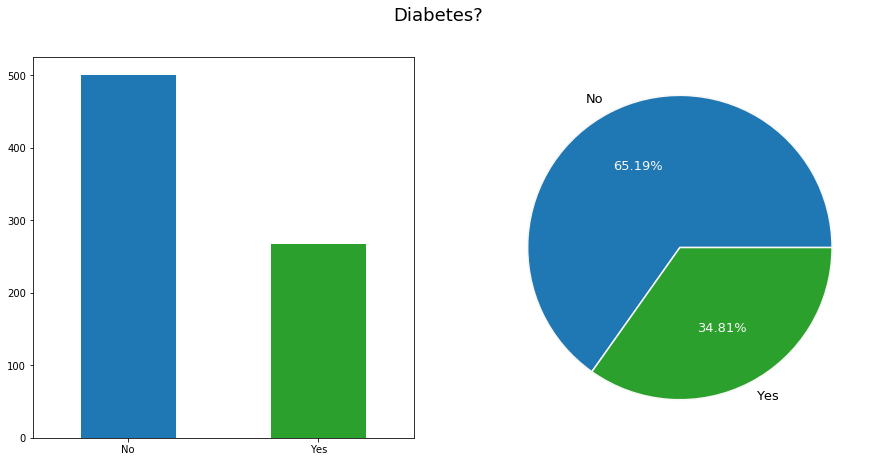

In [0]:
# Plotting data by Matplotlib & Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = diabetes_df_c.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = diabetes_df_c.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

In [0]:
# END